<a href="https://colab.research.google.com/github/jogapritam/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Jogapritam_Sahu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

In [2]:
# Lets make handshake of note book with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/machine learning/2nd project ML/data_cardiovascular_risk.csv')

In [4]:
# Checking dimension of data set 
df.shape

(3390, 17)

In [5]:
# First look of our data 

df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# Checking column names

df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
# Brief description of our data set

df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
# lets check the duplicate
len(df[df.duplicated()])

0

In [9]:
#Check for null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(7,7))
sns.heatmap(missing_values)

In [10]:
df.dropna(inplace=True)

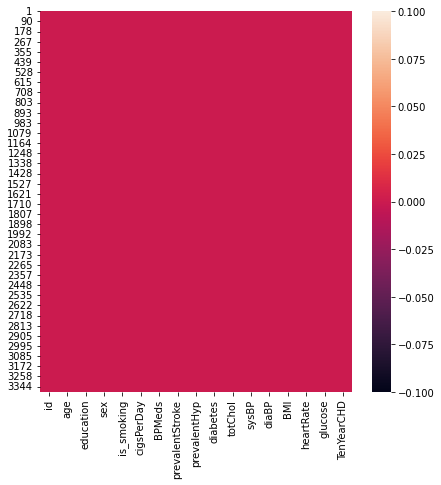

In [15]:
# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(7,7))
sns.heatmap(missing_values)

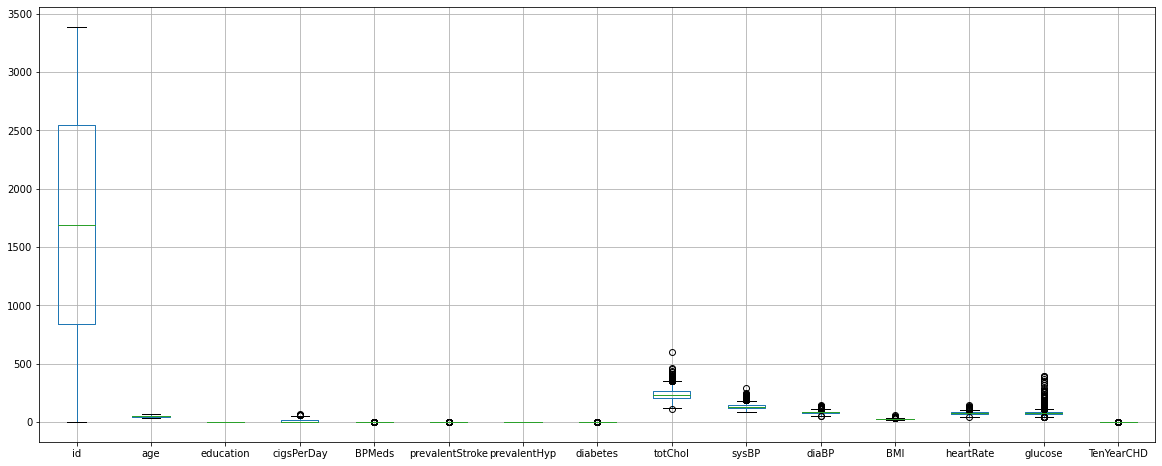

In [12]:
plt.figure(figsize=(20,8))
df.boxplot()

There are outliers in some features.

Let's check the correlation between the feature.

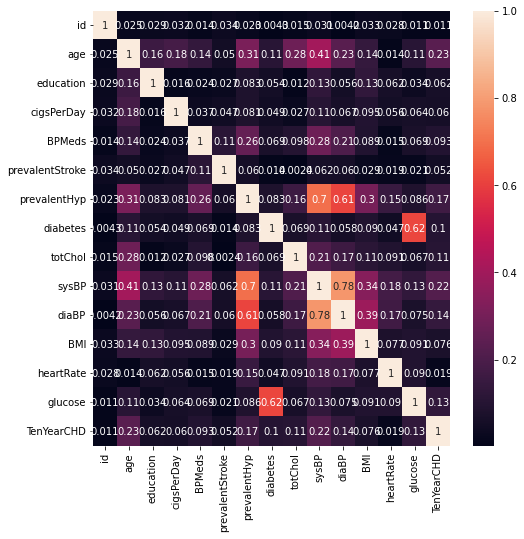

In [21]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)


There is no significant correlation between independent and dependant variables but there is a high correlation within independent variables

# ***Analysis of Categorical features***

In [26]:
df['sex'].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

Let's check which gender is more prone to heart disease

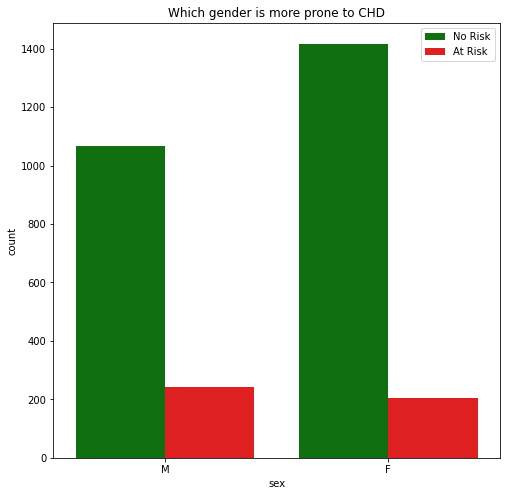

In [27]:
my_palette = {0 : 'green' , 1 : 'red'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (8,8))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

It is showing that out of 1307 male around 200 males are having heart disease and out of 1620 females around 200 females are having heart disease. It is indicating that males and females with almost coressponding 15% and 12% are suffering from heart disease.

Diabetes analysis

In [40]:
df['diabetes'].value_counts()

0    2848
1      79
Name: diabetes, dtype: int64

In [49]:
df.groupby(['diabetes','sex','TenYearCHD'])['TenYearCHD'].count()

diabetes  sex  TenYearCHD
0         F    0             1388
               1              190
          M    0             1045
               1              225
1         F    0               29
               1               13
          M    0               21
               1               16
Name: TenYearCHD, dtype: int64

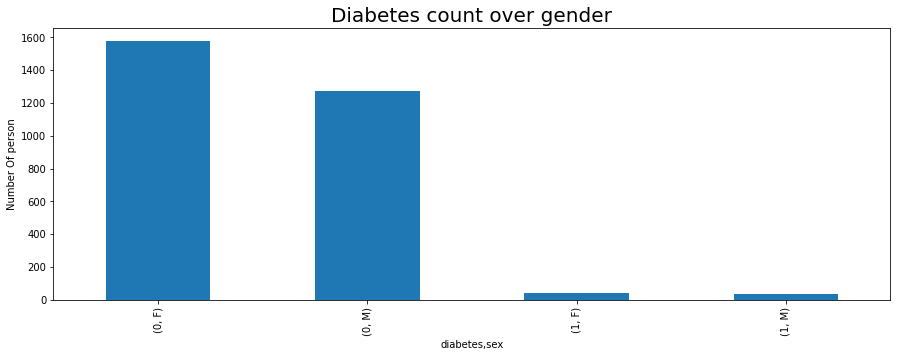

In [50]:
diabetes_Count=df.groupby(['diabetes','sex'])['TenYearCHD'].count()

plt.rcParams['figure.figsize'] = (15, 5)
diabetes_Count.plot(kind='bar')
plt.title('Diabetes count over gender',size=20)
plt.ylabel('Number Of person')
plt.show()

It is showing that out of 79 diabetes patients 42 are female and 37 male.

Smoking wise risk analysis

In [45]:
df['is_smoking'].value_counts()

NO     1480
YES    1447
Name: is_smoking, dtype: int64

In [47]:
df.groupby(['is_smoking','sex','TenYearCHD'])['TenYearCHD'].count()

is_smoking  sex  TenYearCHD
NO          F    0             857
                 1             125
            M    0             416
                 1              82
YES         F    0             560
                 1              78
            M    0             650
                 1             159
Name: TenYearCHD, dtype: int64

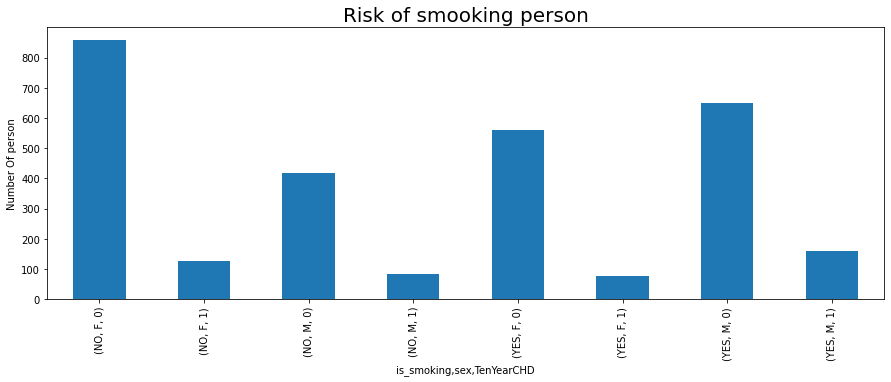

In [52]:
smooking_effect=df.groupby(['is_smoking','sex','TenYearCHD'])['TenYearCHD'].count()

plt.rcParams['figure.figsize'] = (15, 5)
smooking_effect.plot(kind='bar')
plt.title('Risk of smooking person',size=20)
plt.ylabel('Number Of person')
plt.show()

In this dataset out of 1447 smooking persons, total 237 persons are affected by heart disease and out of them 78 are female and 159 are male.

Hypertension wise risk analysis

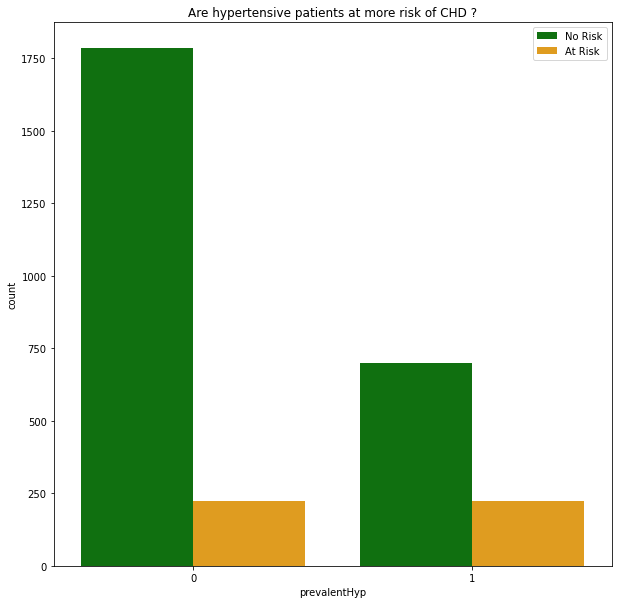

In [55]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'green' , 1 : 'orange'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

From this plot we can say that there is a chance of having heart disease of a person who is going through hypertension, which is an obvious thing.


Blood pressure wise risk analysis

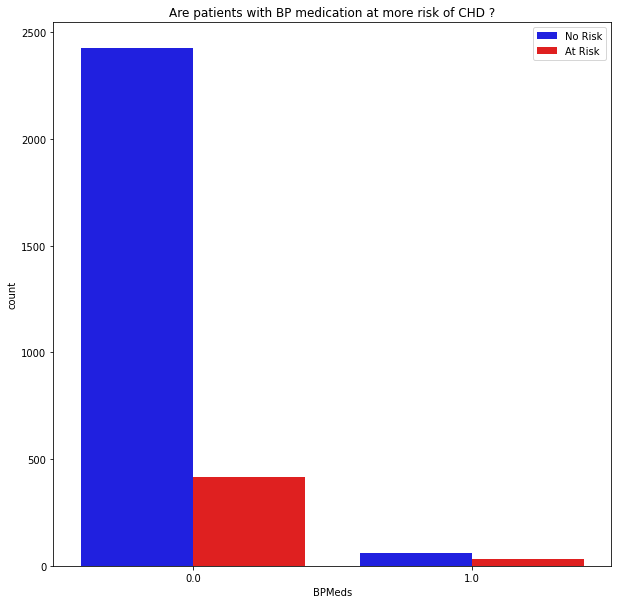

In [58]:
my_palette = {0 : 'blue' , 1 : 'red'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients with BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

This plot showing that if a person is going through bp, then there is a higher chance of having a heart disease.

## ***K-Nearest Neighbour***

In [ ]:
# Let's create numpy arrays for features and target
X = df.drop('TenYearCHD',axis=1).values
y = df['TenYearCHD'].values

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,17)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

ValueError: ignored